# Master BigData UCM 2023

## 1. Datos vehículos a la venta 2016 en UK

Propósito:

- Facilitar la lectura del .csv que contiene los datos de este ejemplo



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotnine
from plotnine import *

### Carga de datos

Este dataset tiene ya 7 años pero sigue siendo válido para nuestro propósito.

La principal ventaja es que tiene una variale de grupo (o "factor") creada en español (la variable "Tipo") para facilitar los gráficos por tipo de vehículo.

In [10]:
df= pd.read_csv("https://raw.githubusercontent.com/pedroconcejero/ucm_master_2024_PYTHON/main/vehiculos_UK_2016.csv", sep = "|")

In [11]:
df.shape

(4490, 20)

In [12]:
df.describe(include = 'all')

,Manufacturer,Model,EngineCapacity,FuelType,MetricUrbanCold,MetricExtraUrban,MetricCombined,ImperialUrbanCold,ImperialExtraUrban,ImperialCombined,CO2gkm,FuelCost12000Miles,EuroStandard,NoiseLeveldBA,EmissionsCOmgkm,THCEmissionsmgkm,EmissionsNOxmgkm,THC+NOxEmissionsmgkm,ParticulatesNo_mgkm,Tipo
count,4490,4490,4490.000000,4490,4459.000000,4459.000000,4490.000000,4459.000000,4459.000000,4490.000000,4490.000000,4490.000000,4490.0,4490.000000,4490.000000,2230.000000,4490.000000,2289.000000,2293.000000,4490
unique,44,450,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,BMW,Coupe,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel
freq,607,260,NaN,2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2274
mean,NaN,NaN,1991.111804,NaN,6.925252,4.790491,5.549042,45.364230,62.014891,55.120445,135.823163,1086.980401,6.0,71.302249,260.113007,41.636726,37.138886,80.458934,0.300039,NaN
std,NaN,NaN,828.057573,NaN,2.800404,1.224893,1.794549,12.962089,12.771535,15.869631,39.732306,348.519954,0.0,1.969812,143.096498,14.819350,18.805169,22.962894,0.331194,NaN
min,NaN,NaN,647.000000,NaN,0.000000,0.000000,0.600000,0.000000,0.000000,17.300000,13.000000,117.000000,6.0,66.000000,10.000000,4.000000,1.000000,19.000000,0.000000,NaN
25%,NaN,NaN,1499.000000,NaN,5.200000,4.000000,4.400000,36.700000,53.300000,46.300000,112.000000,867.000000,6.0,70.000000,156.000000,33.000000,23.000000,66.000000,0.060000,NaN
50%,NaN,NaN,1968.000000,NaN,6.100000,4.500000,5.100000,46.300000,62.800000,55.400000,127.000000,999.500000,6.0,71.000000,230.000000,41.000000,36.000000,81.000000,0.180000,NaN
75%,NaN,NaN,1997.000000,NaN,7.700000,5.300000,6.100000,54.300000,70.600000,64.200000,149.000000,1202.000000,6.0,73.000000,329.000000,49.000000,52.000000,97.000000,0.480000,NaN


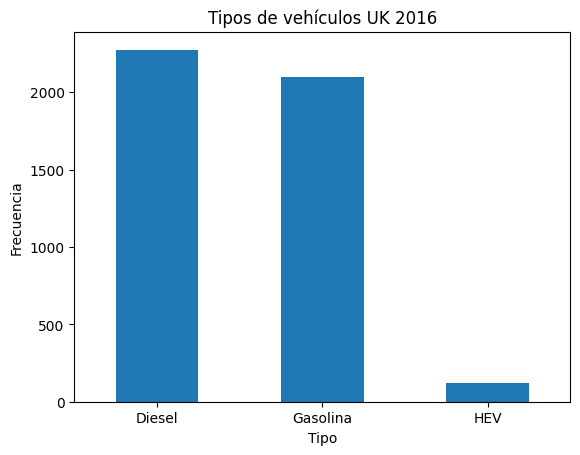

In [13]:
count_classes = pd.value_counts(df['Tipo'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Tipos de vehículos UK 2016")
plt.xlabel("Tipo")
plt.ylabel("Frecuencia");

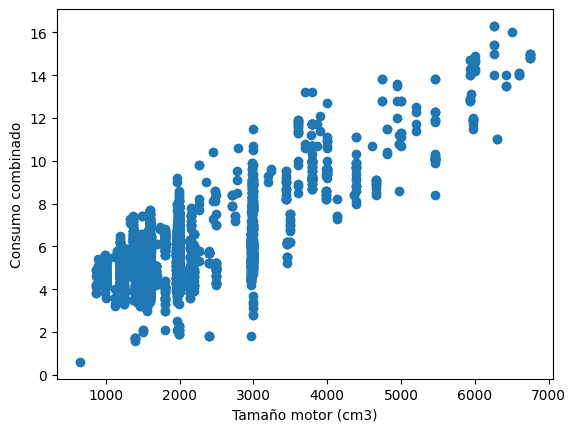

In [14]:
plt.scatter(df['EngineCapacity'],
            df['MetricCombined'])

plt.xlabel('Tamaño motor (cm3)')
plt.ylabel('Consumo combinado')
plt.show()

# 2. Visualizaciones con ggplot

Además del contenido recogido en la docu. teórica, es aconsejable seguir este excelente (y práctico) tutorial:

https://realpython.com/ggplot-python/


## 2.1 Scatterplot dataset vehículos



Para que ggplot funcione con plotnine se debe poner el código dentro de unos paréntesis.

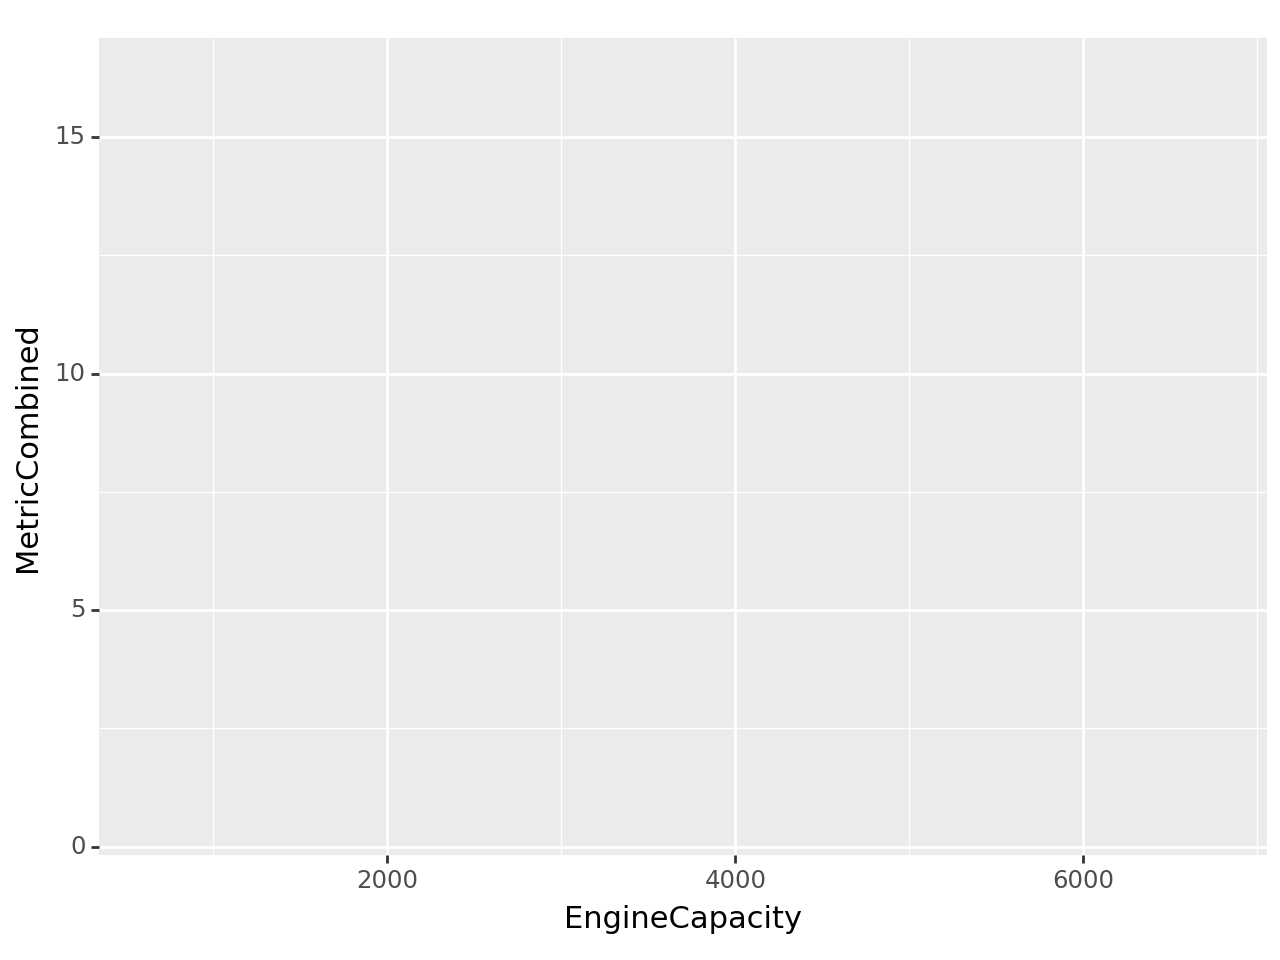

<Figure Size: (640 x 480)>

In [15]:
(
ggplot(df) +
    aes(x = 'EngineCapacity',
          y = 'MetricCombined') # hemos definido los datos y los ejes
) # le falta la geometría por lo que no muestra nada

Automáticamente incluye las etiquetas, una rejilla, los valores de los ejes.

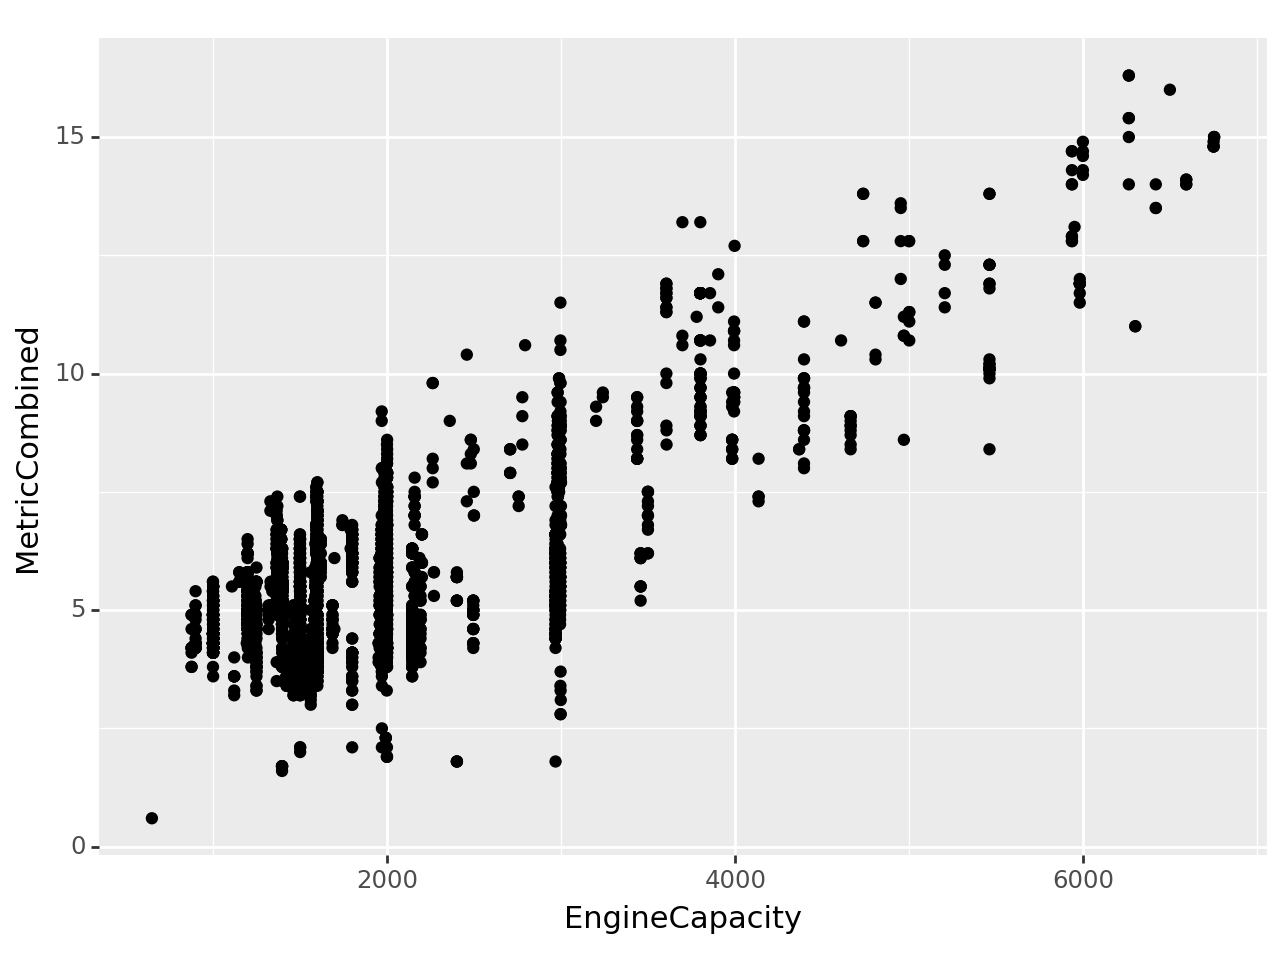

<Figure Size: (640 x 480)>

In [16]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined')  # What variable to use
    + geom_point()   # Geometric object to use for drawing
)

Se puede guardar la base en una variable:

In [17]:
mi_grafico = (
ggplot(df) +
    aes(x = 'EngineCapacity',
          y = 'MetricCombined')
)

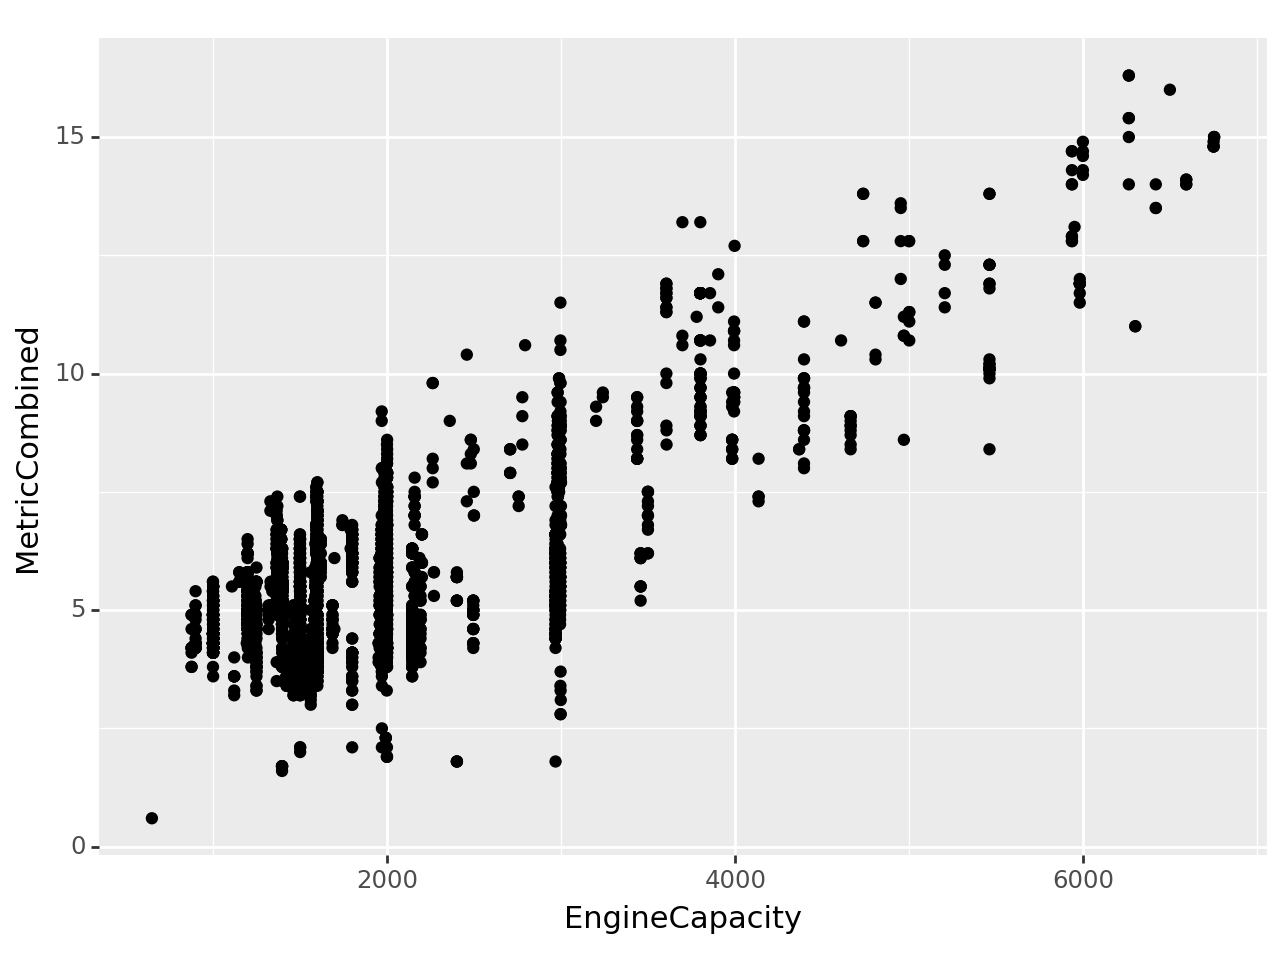

<Figure Size: (640 x 480)>

In [18]:
mi_grafico + geom_point()

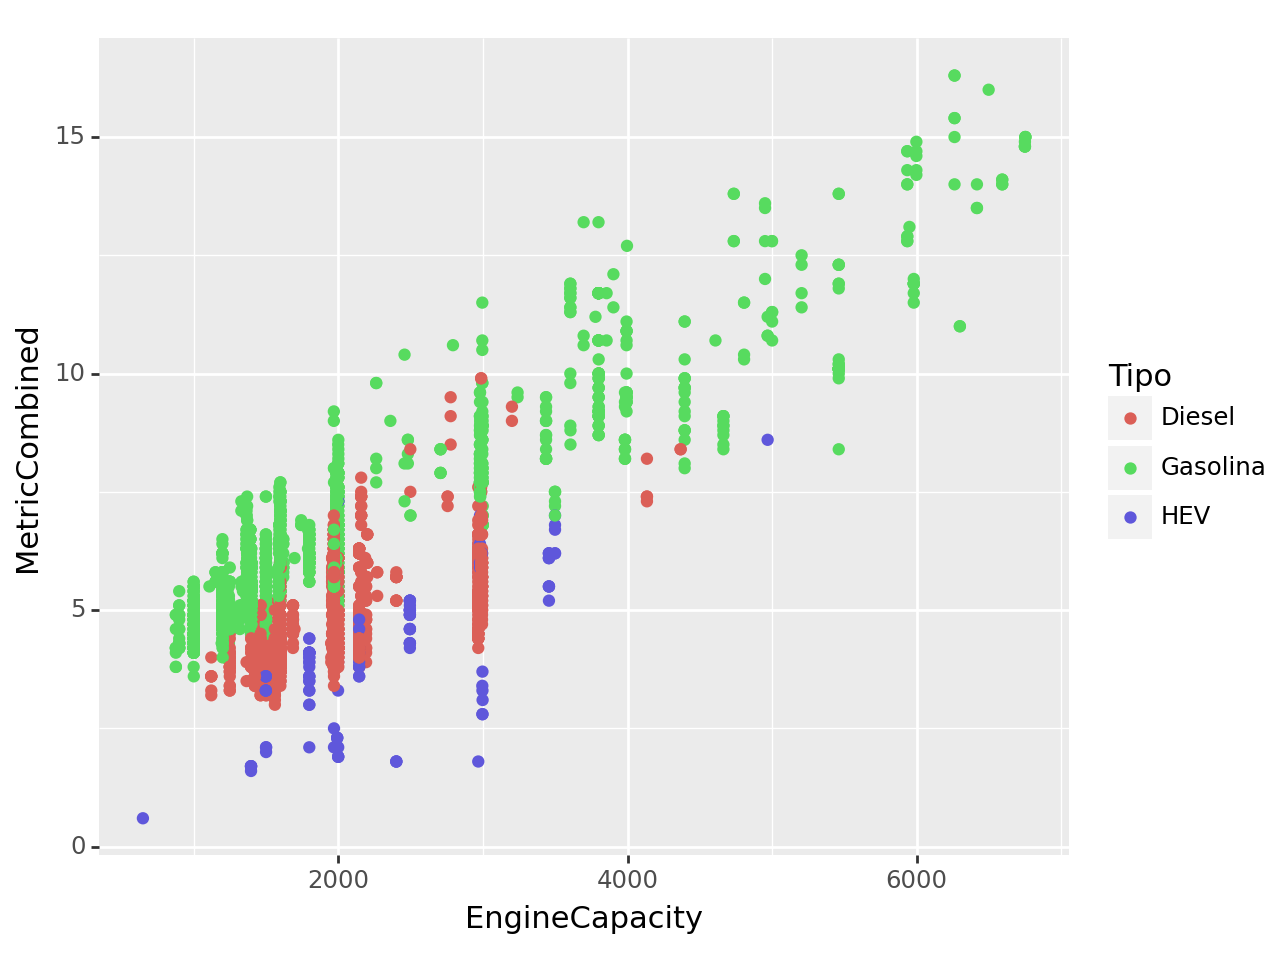

<Figure Size: (640 x 480)>

In [21]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'Tipo')  # colorear en funcion de una variable categórica, por ejemplo Tipo
    + geom_point()   # Geometric object to use for drawing
)

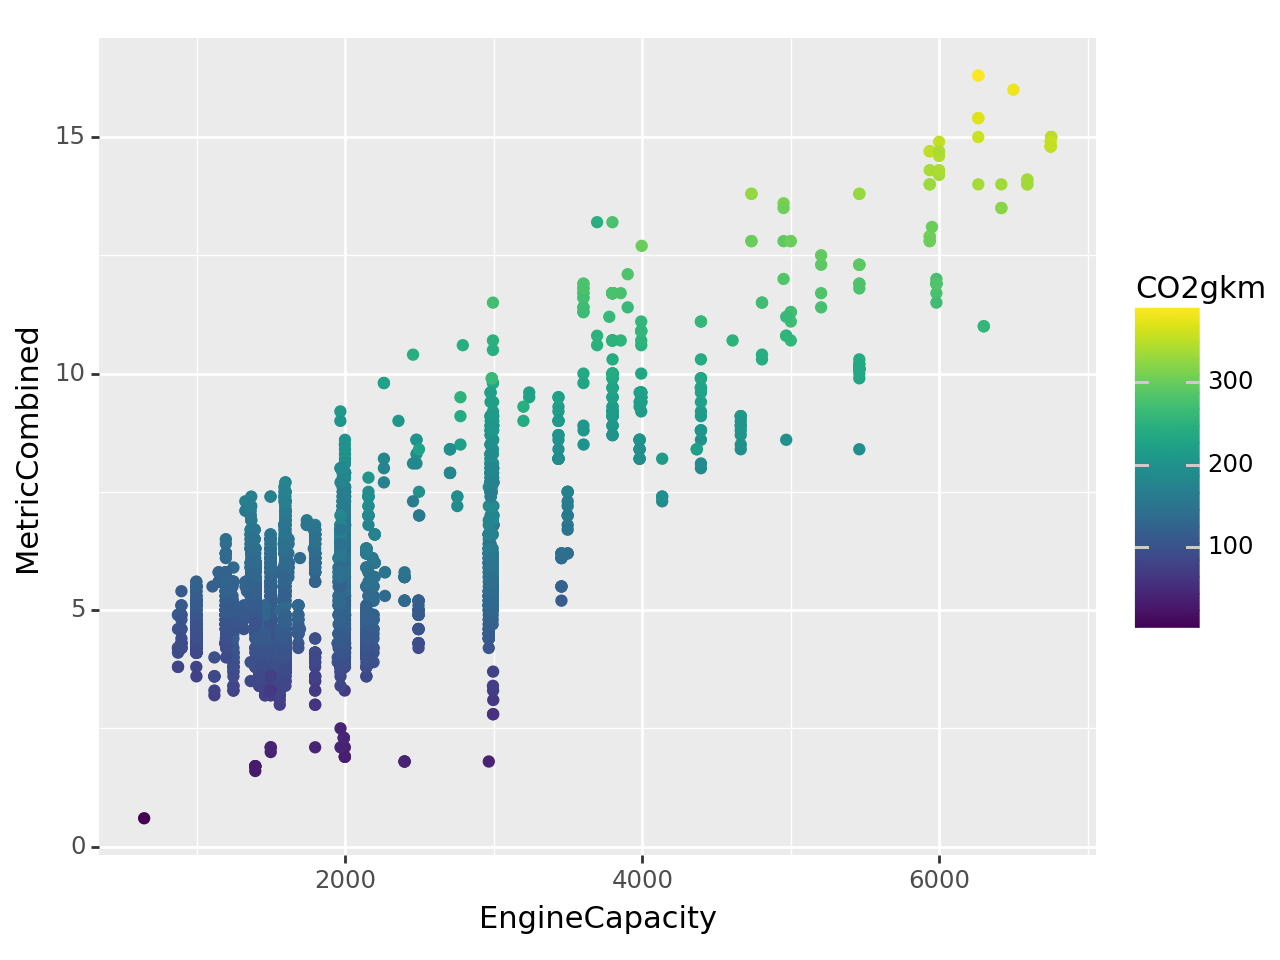

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'CO2gkm')  # Variable cuantitativa = escala de color en un rango
    +  geom_point()   # Geometric object to use for drawing
)

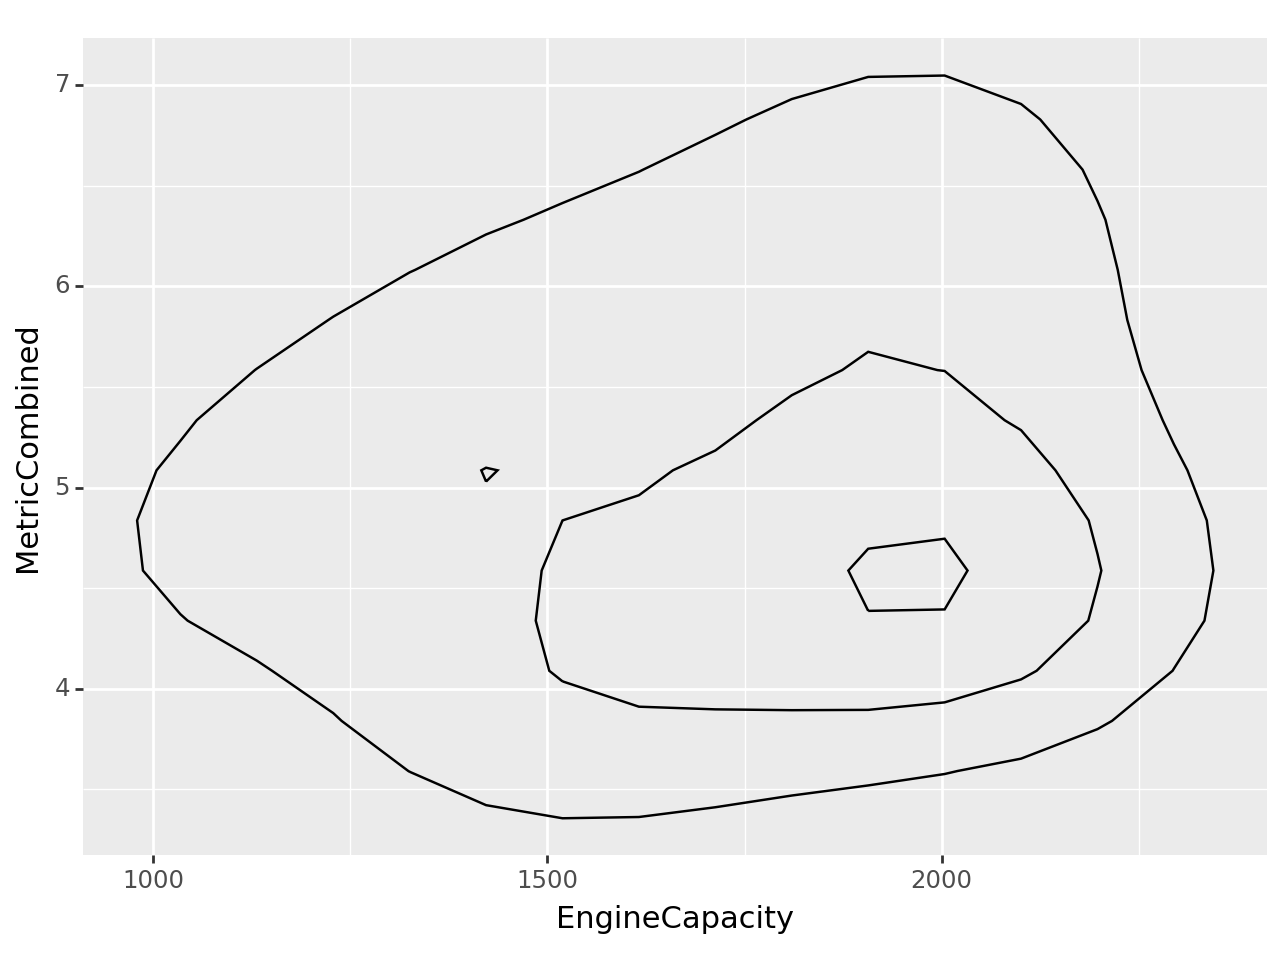

<Figure Size: (640 x 480)>

In [23]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'CO2gkm')  # What variable to use
    +  geom_density_2d()   # Geometric object to use for drawing
)

In [27]:
# !pip install scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.9 MB/s eta 0:00:00


In [28]:
import sklearn
import skmisc

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


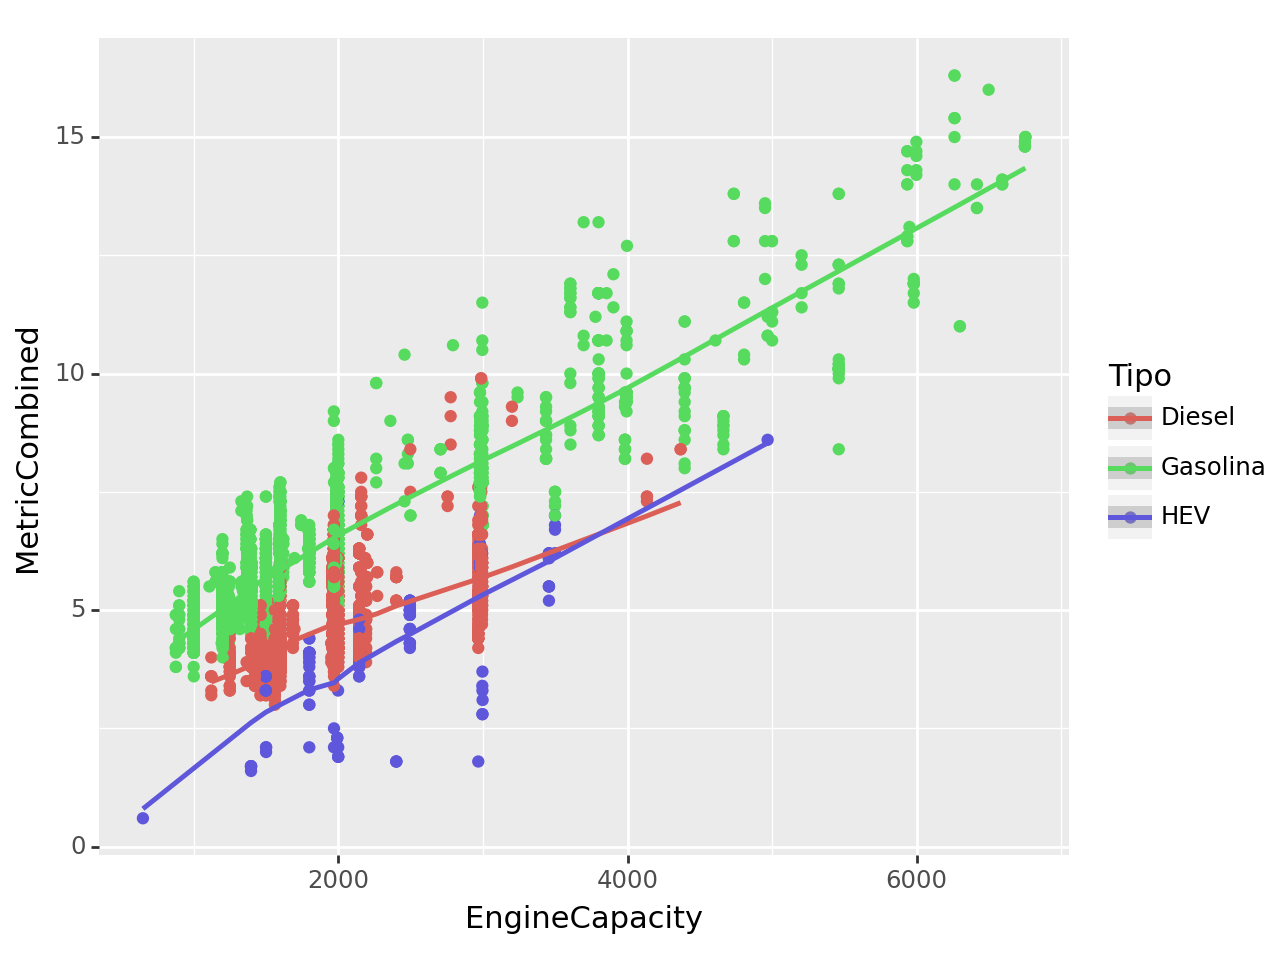

<Figure Size: (640 x 480)>

In [38]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'Tipo')  # What variable to use
    + geom_point()
    + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
)

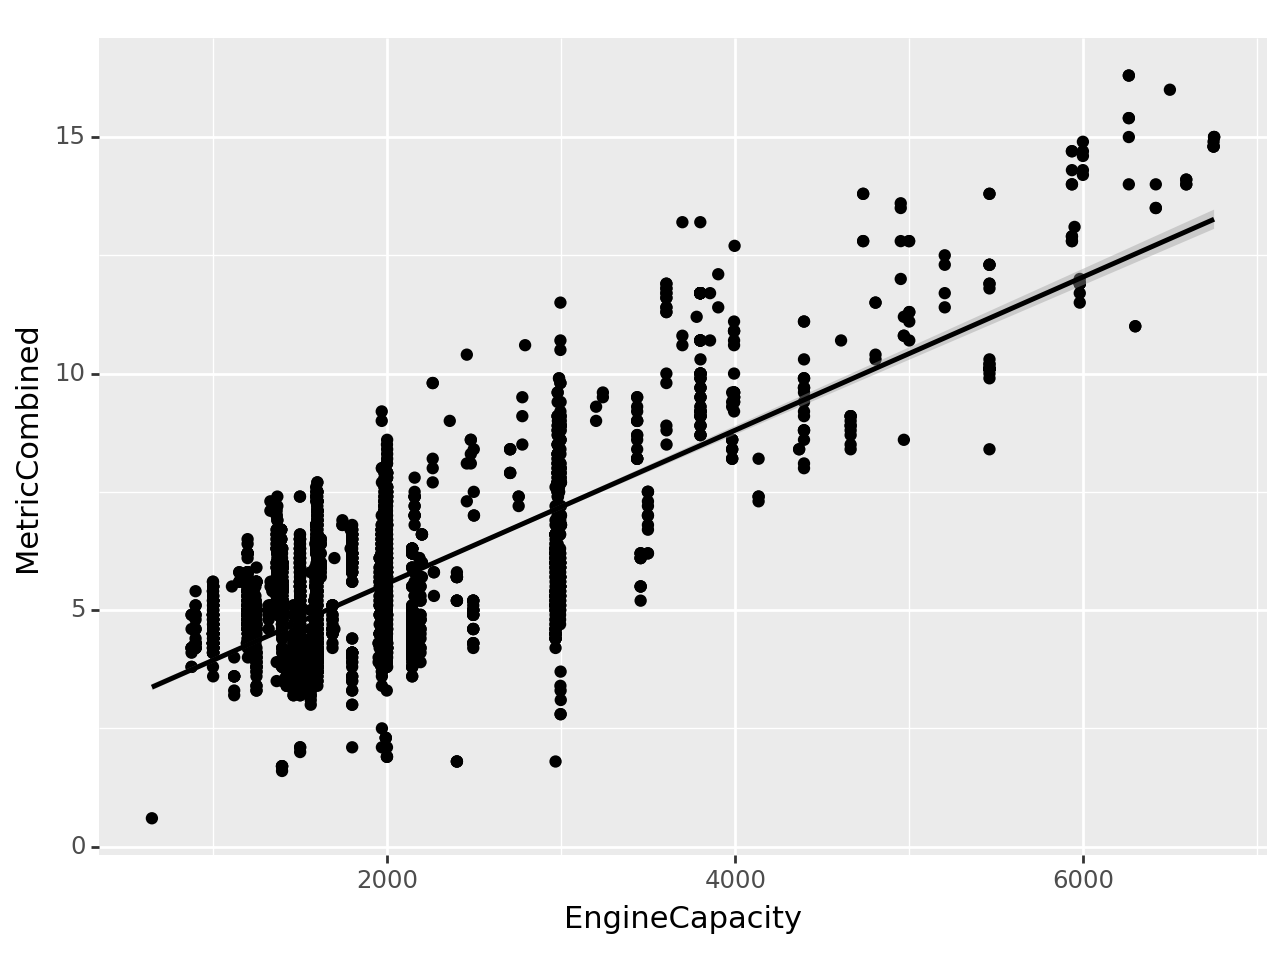

<Figure Size: (640 x 480)>

In [30]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined')  # What variable to use
    + geom_point()
    + geom_smooth() # Geometric object to use for drawing
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


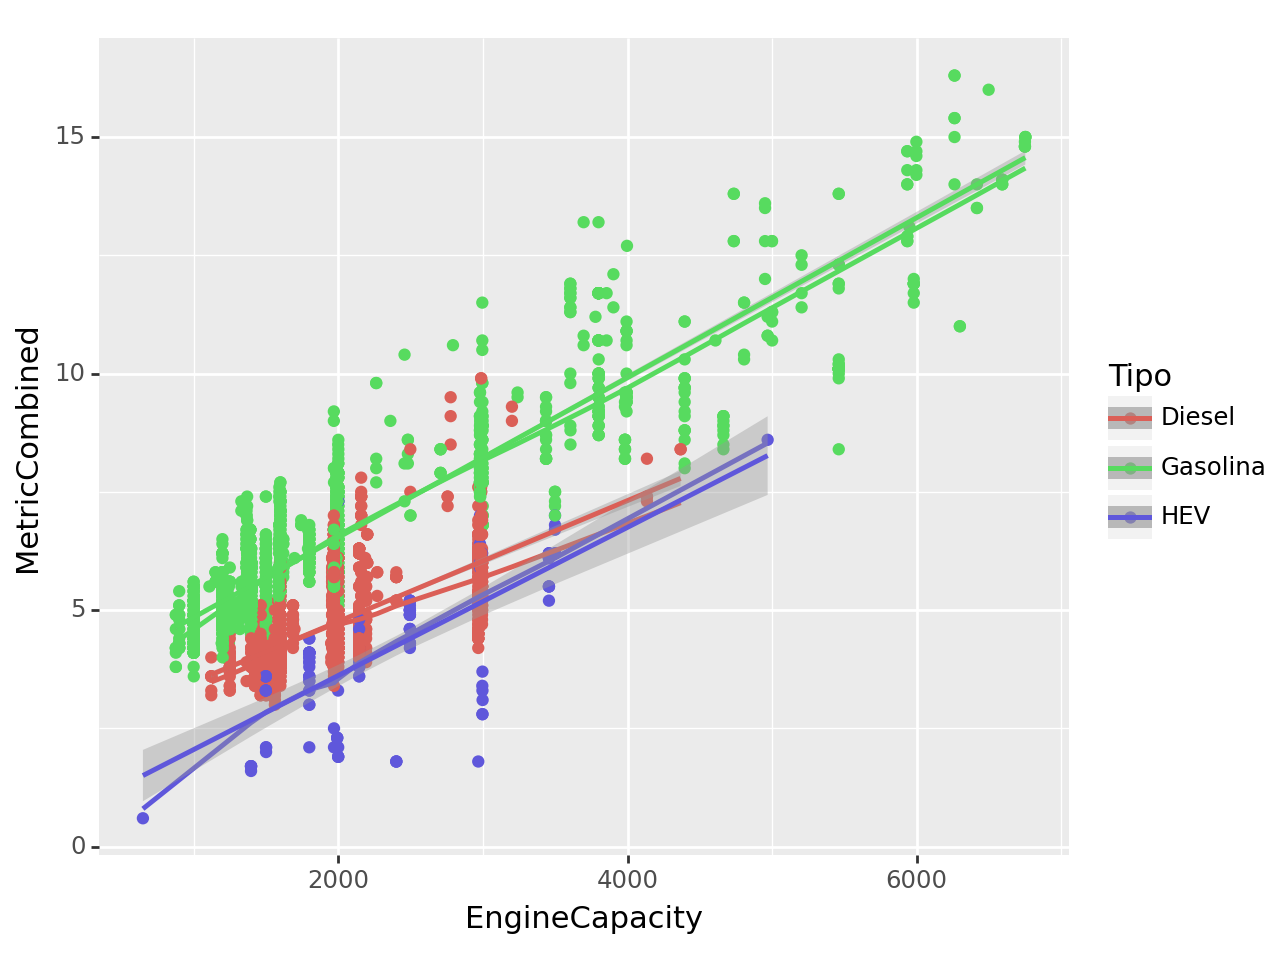

<Figure Size: (640 x 480)>

In [31]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'Tipo')  # What variable to use
    + geom_point()
    + geom_smooth(method = 'lowess')
    + geom_smooth(method = 'lm')
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


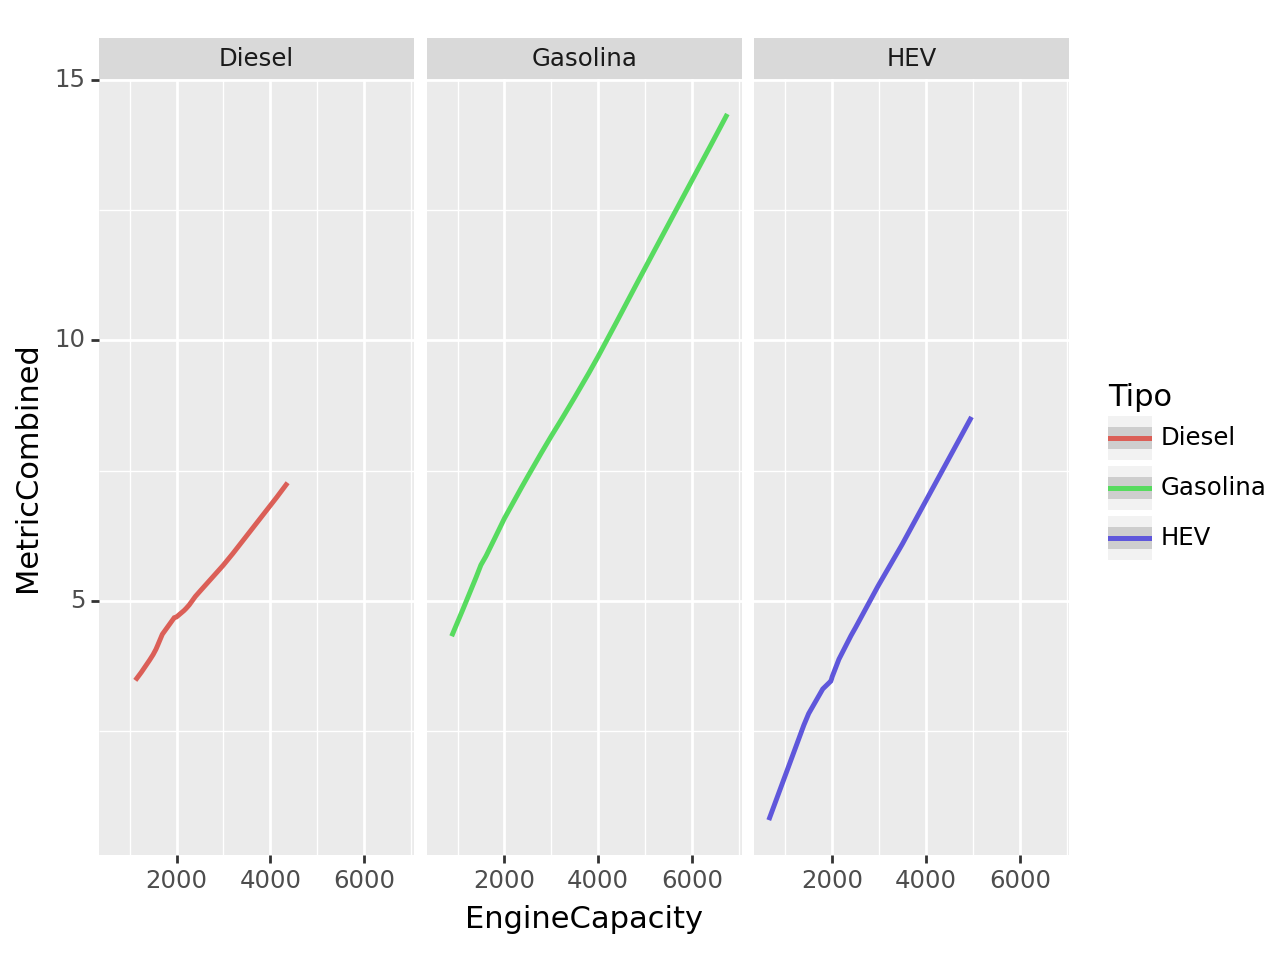

<Figure Size: (640 x 480)>

In [32]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'Tipo')  # What variable to use
    + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
    + facet_grid(facets = ". ~ Tipo")
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


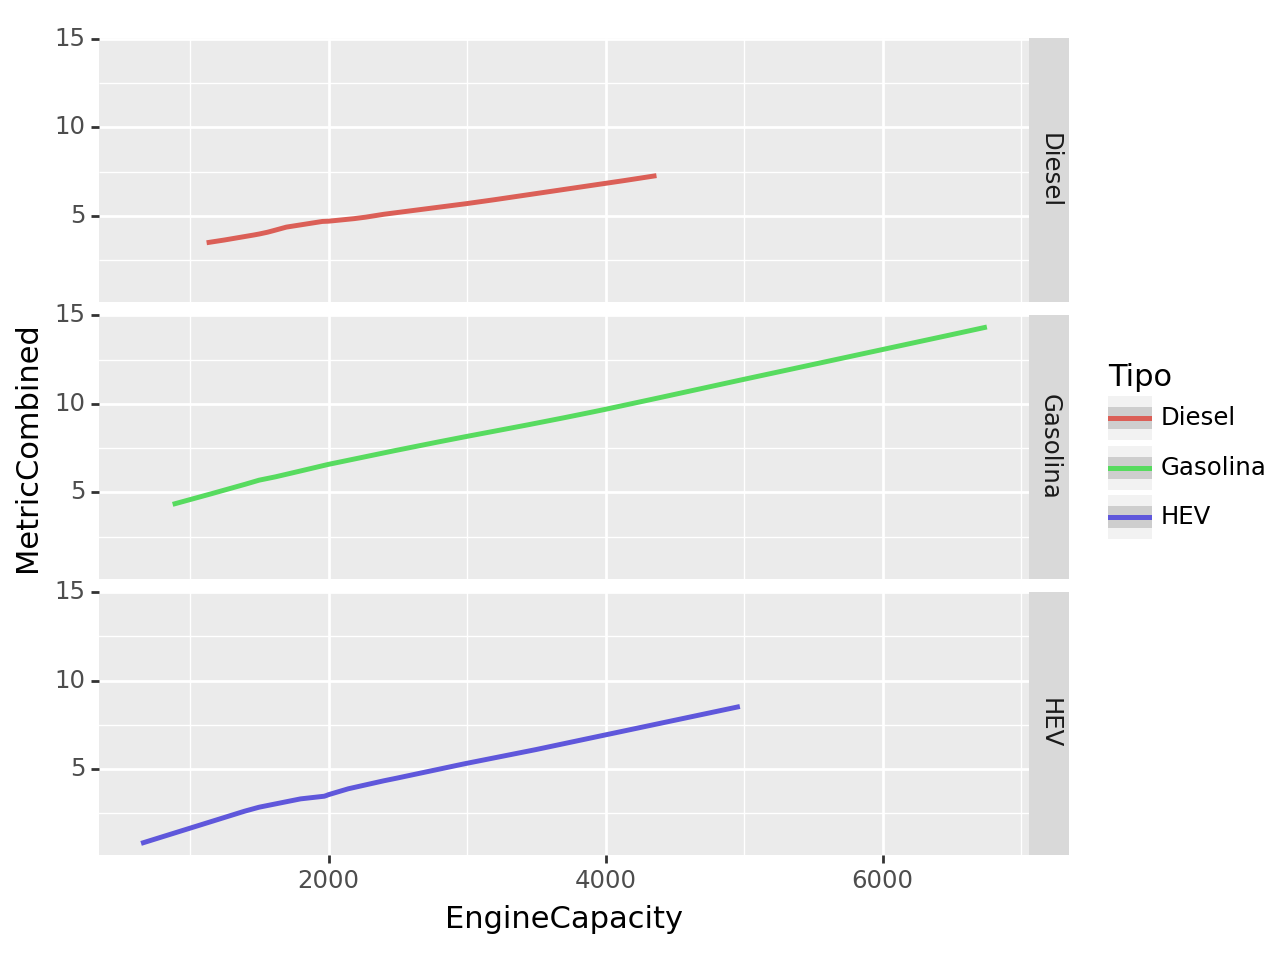

<Figure Size: (640 x 480)>

In [39]:
(
    ggplot(df)  # What data to use
    + aes(x = 'EngineCapacity',
          y = 'MetricCombined',
         color = 'Tipo')  # What variable to use
    + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
    + facet_grid(facets = "Tipo ~ . ")
)

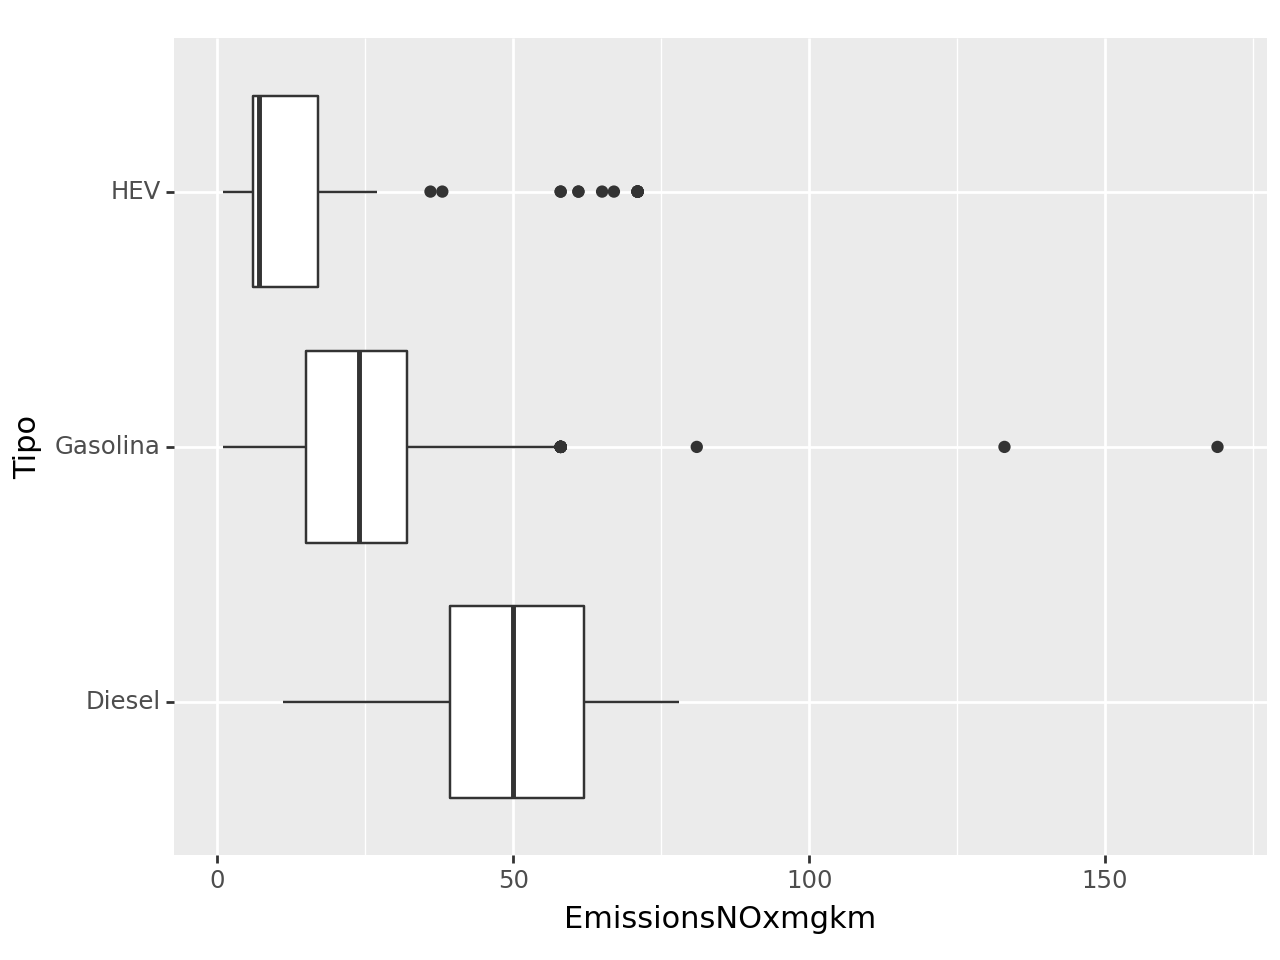

<Figure Size: (640 x 480)>

In [40]:
(
    ggplot(df)
    + aes( x = 'Tipo',
         y = "EmissionsNOxmgkm")
    + geom_boxplot()
    + coord_flip()
#    + theme_classic()

)

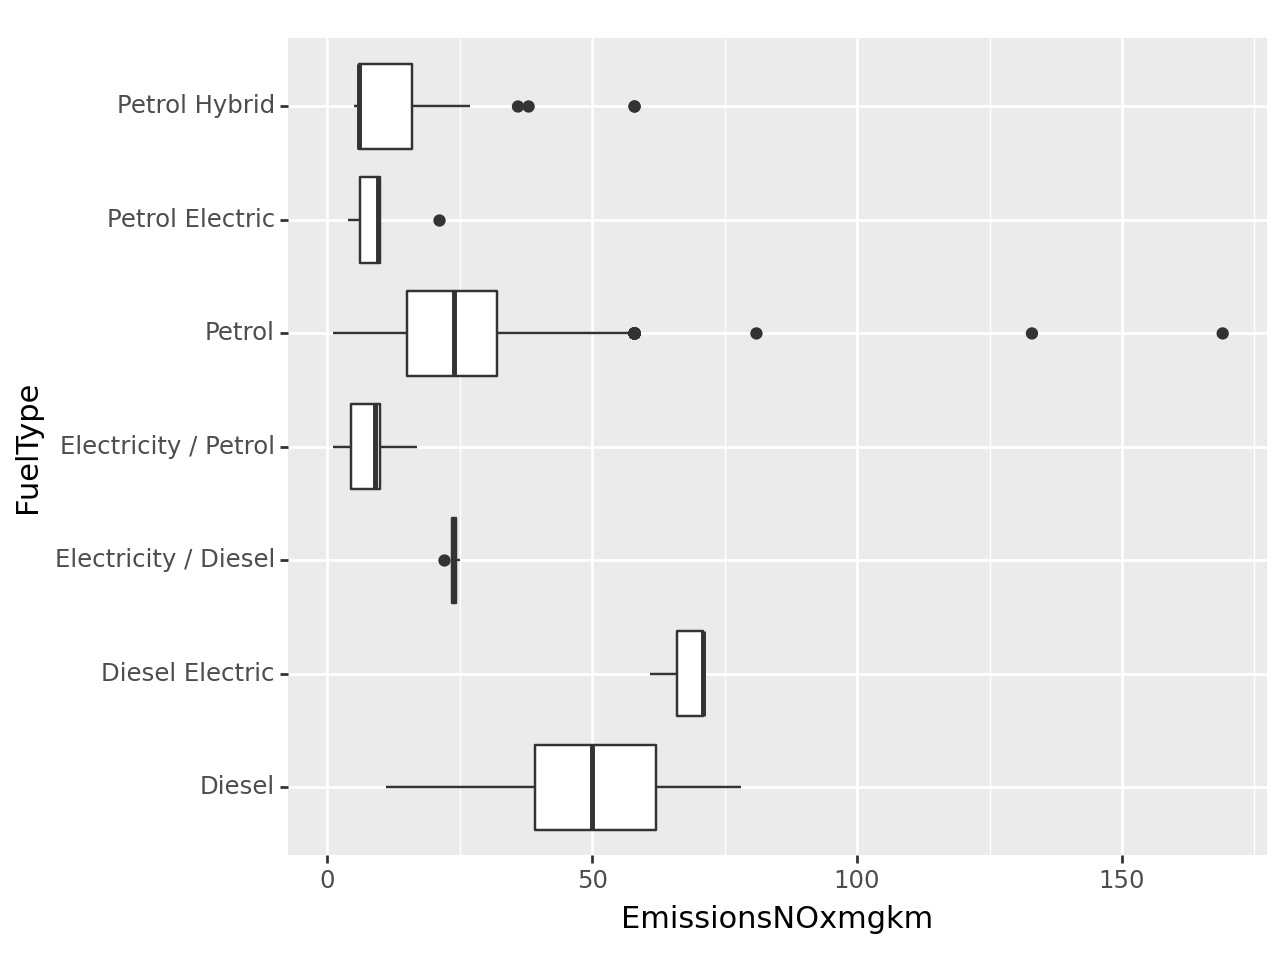

<Figure Size: (640 x 480)>

In [41]:
(
    ggplot(df)
    + aes( x = 'FuelType',
         y = "EmissionsNOxmgkm")
    + geom_boxplot()
    + coord_flip()
#    + geom_text(aes(label = "Model"))

)